In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
dir_in='/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc/'
dir_out='/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc_increasePrecipitation/'

In [3]:
fnames_all=glob.glob(dir_in+'*0049*.nc')
fnames_ha2x1d=glob.glob(dir_in+'*ha2x1d*0049*.nc')
fnames_ha2x1h=glob.glob(dir_in+'*ha2x1h*0049*.nc')
fnames_ha2x3h=glob.glob(dir_in+'*ha2x3h*0049*.nc')
#ha2x1hi

In [21]:
ds = xr.open_dataset(dir_in+'COUP0000_PI_SOM.cpl.ha2x1hi.0142-01.nc')

In [22]:
ds

<xarray.Dataset>
Dimensions:            (a2x1hi_nx: 144, a2x1hi_ny: 96, doma_nx: 144, doma_ny: 96, ntb: 2, time: 744)
Coordinates:
  * time               (time) object 0142-01-01 00:45:00 ... 0142-01-31 23:30:00
Dimensions without coordinates: a2x1hi_nx, a2x1hi_ny, doma_nx, doma_ny, ntb
Data variables:
    time_bnds          (time, ntb) object ...
    doma_lat           (doma_ny, doma_nx) float64 ...
    doma_lon           (doma_ny, doma_nx) float64 ...
    doma_area          (doma_ny, doma_nx) float64 ...
    doma_aream         (doma_ny, doma_nx) float64 ...
    doma_mask          (doma_ny, doma_nx) float64 ...
    doma_frac          (doma_ny, doma_nx) float64 ...
    a2x1hi_Faxa_swndr  (time, a2x1hi_ny, a2x1hi_nx) float32 ...
    a2x1hi_Faxa_swvdr  (time, a2x1hi_ny, a2x1hi_nx) float32 ...
    a2x1hi_Faxa_swndf  (time, a2x1hi_ny, a2x1hi_nx) float32 ...
    a2x1hi_Faxa_swvdf  (time, a2x1hi_ny, a2x1hi_nx) float32 ...
Attributes:
    file_version:   cpl7v10
    model_doi_url:  
    histo

In [4]:
print(len((fnames_all)))
print(len(fnames_ha2x1d)+len(fnames_ha2x1h)+len(fnames_ha2x3h))

48
48


In [11]:
ds_1d = xr.open_dataset(fnames_ha2x1d[0]) #do not need to change
ds_1h = xr.open_dataset(fnames_ha2x1h[0]) #do not need to change
ds_3h = xr.open_dataset(fnames_ha2x3h[0])

In [16]:
for var in ds_1d.variables:
    print(ds_1d[)

time
time_bnds
a2x1d_Faxa_bcphiwet
a2x1d_Faxa_bcphodry
a2x1d_Faxa_bcphidry
a2x1d_Faxa_ocphiwet
a2x1d_Faxa_ocphidry
a2x1d_Faxa_ocphodry
a2x1d_Faxa_dstwet1
a2x1d_Faxa_dstdry1
a2x1d_Faxa_dstwet2
a2x1d_Faxa_dstdry2
a2x1d_Faxa_dstwet3
a2x1d_Faxa_dstdry3
a2x1d_Faxa_dstwet4
a2x1d_Faxa_dstdry4
a2x1d_Sa_co2prog
a2x1d_Sa_co2diag


In [23]:
ds=ds
for var in ds.variables:
    if var not in ['time','time_bnds']:
        #print(var)
        print(ds[var].long_name)
        #print('-----------------')

latitude
longitude
cell_area_model
cell_area_mapping
mask
area_fraction
Direct near-infrared incident solar radiation
Direct visible incident solar radiation
Diffuse near-infrared incident solar radiation
Diffuse visible incident solar radiation


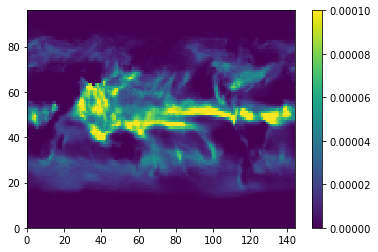

In [7]:
plt.pcolormesh(ds['a2x3h_Faxa_rainc'].mean(dim='time'), vmax=0.0001)
plt.colorbar()

# May change:
#a2x3h_Sa_tbot, a2x3h_Sa_ptem, a2x3h_Sa_shum
#a2x3h_Faxa_rainc, a2x3h_Faxa_rainl, a2x3h_Faxa_snowc, a2x3h_Faxa_snowl


# Write out new files

In [8]:
var_to_change='a2x3h_Faxa_rainl'
for i, fname_full in enumerate(fnames_ha2x3h):
    print(i)
    ds=xr.open_dataset(fname_full)
    fname_out=fname_full.split('/')[9]
    ds[var_to_change]=ds[var_to_change]+0.0001
    ds.to_netcdf(path=dir_out+fname_out,
                                format="NETCDF3_64BIT")

0
1
2
3
4
5
6
7
8
9
10
11


In [9]:
test_orig=xr.open_dataset('/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc/'+
                         'COUP0000_PI_SOM.cpl.ha2x3h.0061-01.nc')
test_new=xr.open_dataset('/glade/scratch/czarakas/archive/CoupledPPE/COUP0000_PI_SOM/cpl/proc_increasePrecipitation/'+
                         'COUP0000_PI_SOM.cpl.ha2x3h.0061-01.nc')

In [17]:
delta_var_to_change=test_new[var_to_change]-test_orig[var_to_change]
delta_other_var=test_new['a2x3h_Faxa_swndf']-test_orig['a2x3h_Faxa_swndf']

In [18]:
print(np.nanmax(delta_var_to_change))
print(np.nanmean(delta_var_to_change))
print(np.nanmin(delta_var_to_change))

0.000100000005
0.000100000325
9.999995e-05


In [19]:
print(np.nanmax(delta_other_var))
print(np.nanmean(delta_other_var))
print(np.nanmin(delta_other_var))

0.0
0.0
0.0


# Check outputs are different

In [24]:
ds_original=xr.open_dataset('/glade/scratch/czarakas/archive/OFFL0000_PI_v18/lnd/hist/'+
                           'OFFL0000_PI_v18.clm2.h0.0049-02-01-00000.nc')
ds_new=xr.open_dataset('/glade/scratch/czarakas/archive/OFFL0000_PI_increasePrecip_test02/lnd/hist/'+
                       'OFFL0000_PI_increasePrecip_test02.clm2.h0.0049-02-01-00000.nc')

In [39]:
delta=(ds_new.EFLX_LH_TOT[1,:,:]-ds_original.EFLX_LH_TOT[1,:,:])

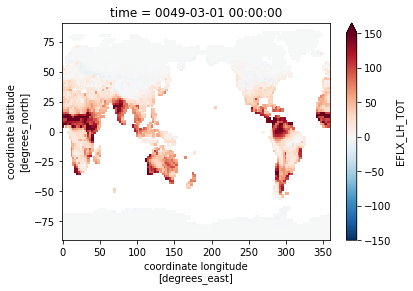

In [42]:
delta.plot(vmax=150)#vmax=1)#vmax=0.0002, vmin=-0.0001)